### Cross Embedding
In this notebook I will test the idea of cross embedding.


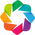

In [13]:
import numpy as np
from swktools.plotting import plot3d
import swktools.TakensEmbed as te
import holoviews as hv
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.neighbors import NearestNeighbors
hv.extension('matplotlib','bokeh')
colors= hv.core.options.Cycle.default_cycles['default_colors']


In [15]:
%%opts Curve {+axiswise}
%%output backend='bokeh'
%matplotlib inline
# parameters
rx = 3.8
ry = 3.5
bxy = .02
byx = .1
x1 = .4
y1 = .2
n = 3000
poisson = False
shift = False
sol = np.zeros((n,2))

sol[0,0] = x1
sol[0,1] = y1

for i in range(1,n):
    sol[i,0] = sol[i-1,0]*(rx-rx*sol[i-1,0]-bxy*sol[i-1,1])
    sol[i,1] = sol[i-1,1]*(ry-ry*sol[i-1,1]-byx*sol[i-1,0])

if poisson:
    measT = 100
    sol = np.random.poisson(sol*measT)/measT
if shift:
    shift = 500
    sol_shifted = np.zeros((n-shift, 2))
    sol_shifted[:, 0] = sol[:-shift, 0]
    sol_shifted[:, 1] = sol[shift:, 1]
    sol = sol_shifted

x = sol[:, 0]
y = sol[:, 1]

lorenzian = hv.Overlay([hv.Path(d) for d in zip(np.array_split(x, 1), np.array_split(y, 1))])
lorenzian(style={'Path': dict(color=hv.Palette('Blues'), linewidth=1)})+hv.Curve(x)*hv.Curve(y)

:Layout
   .Overlay.I  :Overlay
      .Path.I :Path   [x,y]
   .Overlay.II :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)

In [3]:
%matplotlib nbagg

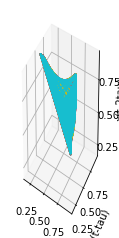

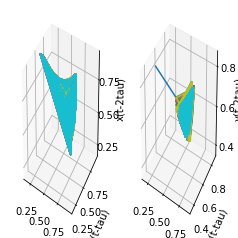

In [16]:
tau = 1 # how many time steps to go back
ndelay = 3 # how many dimensions to do for the delays
delayed = te.get_delayed_manifold(sol, tau, ndelay)

if ndelay == 3:
    fig = plt.figure()
    ntraj=20
    ax = fig.add_subplot(131, projection='3d')
    plot3d(delayed[0,::1,:], ntraj=ntraj, labels=['x(t)','x(t-tau)','x(t-2tau)'], ax=ax)
    ax = fig.add_subplot(132, projection='3d')
    plot3d(delayed[1,::1,:], ntraj=ntraj, labels=['y(t)','y(t-tau)','y(t-2tau)'], ax=ax)
if ndelay == 2:
    fig = hv.Curve(delayed[0,:, :]) + hv.Curve(delayed[1, : , :])
fig

In [17]:
%%output backend='bokeh'
reload(te)
cors = te.do_embedding(delayed, range(7, 2500, 40))

hv.Curve(cors[0,1,:], label='y|Mx')*hv.Curve(cors[1,0,:],label='x|My')

:Overlay
   .Curve.Y_vertical_line_Mx :Curve   [x]   (y)
   .Curve.X_vertical_line_My :Curve   [x]   (y)

Randomized delay coordinates

In [19]:
%%output backend='bokeh'

cors = te.do_embedding(delayed, range(7, 2500, 40), True)

hv.Curve(cors[0,1,:], label='y|Mx')*hv.Curve(cors[1,0,:],label='x|My')

:Overlay
   .Curve.Y_vertical_line_Mx :Curve   [x]   (y)
   .Curve.X_vertical_line_My :Curve   [x]   (y)

### Do above for Lorentz attractor

:Layout
   .Overlay.I  :Overlay
      .Path.I :Path   [x,y]
   .Overlay.II :Overlay
      .Curve.X :Curve   [x]   (y)
      .Curve.Y :Curve   [x]   (y)
      .Curve.Z :Curve   [x]   (y)
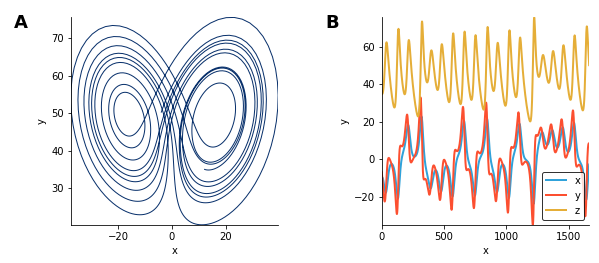

In [7]:
# %matplotlib inline
sigma = 10
rho = 50
beta = 8.0/3
theta = 3 * np.pi / 4

def lorenz(xyz, t):
    x, y, z = xyz
    x_dot = sigma * (y - x)
    y_dot = x * rho - x * z - y
    z_dot = x * y - beta* z
    return [x_dot, y_dot, z_dot]

initial = (-10, -7, 35)
t = np.arange(0, 10, 0.006)
N = len(t)
solution = odeint(lorenz, initial, t)
# solution = np.random.poisson((solution+40)*10)
x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]
xprime = np.cos(theta) * x - np.sin(theta) * y

lorenzian = hv.Overlay([hv.Path(d) for d in zip(np.array_split(xprime, 1), np.array_split(z, 1))])
fig = lorenzian(style={'Path': dict(color=hv.Palette('Blues'), linewidth=1)})
fig+= hv.Curve(x, label='x')*hv.Curve(y, label='y')*hv.Curve(z, label='z')
fig

<IPython.core.display.Javascript object>


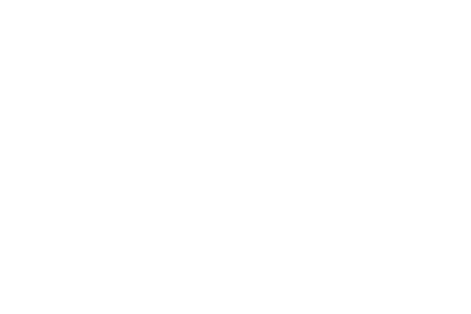

<IPython.core.display.Javascript object>


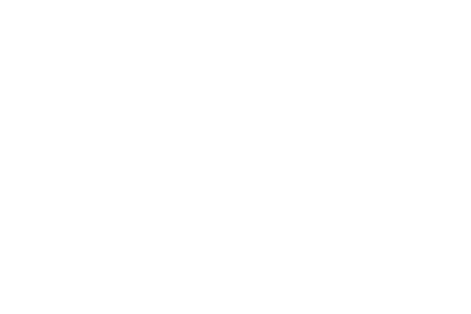

In [8]:
%matplotlib nbagg
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot3d(solution[::1,:], ntraj=1, ax=ax)

### Do above in delay coordinates

<IPython.core.display.Javascript object>


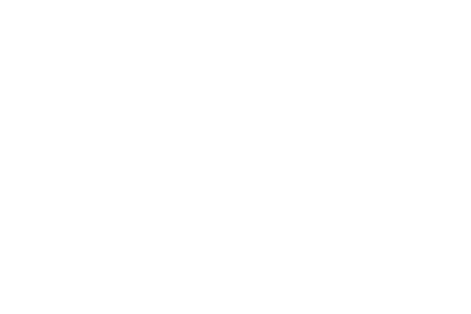

In [9]:
%matplotlib nbagg
tau = 10 # how many time steps to go back
ndelay = 3 # how many dimensions to do for the delays
delayed = te.get_delayed_manifold(solution, tau, ndelay)

if ndelay == 3:
    fig = plt.figure()
    ntraj=20
    ax = fig.add_subplot(131, projection='3d')
    plot3d(delayed[0,::1,:], ntraj=ntraj, labels=['x(t)','x(t-tau)','x(t-2tau)'], ax=ax)
    ax = fig.add_subplot(132, projection='3d')
    plot3d(delayed[1,::1,:], ntraj=ntraj, labels=['y(t)','y(t-tau)','y(t-2tau)'], ax=ax)
    ax = fig.add_subplot(133, projection='3d')
    plot3d(delayed[2,::1,:], ntraj=ntraj, labels=['z(t)','z(t-tau)','z(t-2tau)'], ax=ax)


### Do embedding stuff

In [10]:
%%output backend='bokeh'
%matplotlib inline
cors = te.do_embedding(delayed, range(20, 1000, 20))
fig = hv.Curve(cors[0,1,:], label='y|Mx')*hv.Curve(cors[1,0,:], label='x|My')
fig+= hv.Curve(cors[0,2,:], label='z|Mx')*hv.Curve(cors[2,0,:], label='x|Mz')
fig+= hv.Curve(cors[1,2,:], label='z|My')*hv.Curve(cors[2,1,:], label='y|Mz')
fig

:Layout
   .Overlay.I   :Overlay
      .Curve.Y_vertical_line_Mx :Curve   [x]   (y)
      .Curve.X_vertical_line_My :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Curve.Z_vertical_line_Mx :Curve   [x]   (y)
      .Curve.X_vertical_line_Mz :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Curve.Z_vertical_line_My :Curve   [x]   (y)
      .Curve.Y_vertical_line_Mz :Curve   [x]   (y)

With randomized coordinates

In [11]:
%%output backend='bokeh'
%matplotlib inline
cors = te.do_embedding(delayed, range(20, 1000, 20),True)
fig = hv.Curve(cors[0,1,:], label='y|Mx')*hv.Curve(cors[1,0,:], label='x|My')
fig+= hv.Curve(cors[0,2,:], label='z|Mx')*hv.Curve(cors[2,0,:], label='x|Mz')
fig+= hv.Curve(cors[1,2,:], label='z|My')*hv.Curve(cors[2,1,:], label='y|Mz')
fig

:Layout
   .Overlay.I   :Overlay
      .Curve.Y_vertical_line_Mx :Curve   [x]   (y)
      .Curve.X_vertical_line_My :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Curve.Z_vertical_line_Mx :Curve   [x]   (y)
      .Curve.X_vertical_line_Mz :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Curve.Z_vertical_line_My :Curve   [x]   (y)
      .Curve.Y_vertical_line_Mz :Curve   [x]   (y)

### Do all of above for system from paper